# Machine Learning II - Assignment 1
Due: April 18, 2021 \
Group Members: Debasmita Duta, Skyler MacGowan, Yannik Suhre, Sebastian Sydow

## Part 1

<b>Testing out use of markdown mode within a cell that is otherwise not at all markdown</b>

Population size: 3000
Infected at t=0: 1
R0= 2.6
R_eff=1 at t= 39 d


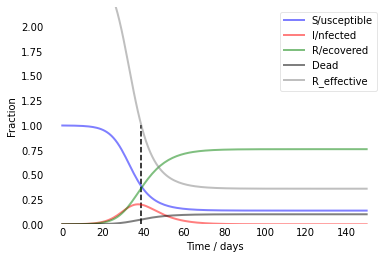

In [37]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
%matplotlib inline

display(Markdown('<b>Testing out use of markdown mode within a cell that is otherwise not at all markdown</b>'))

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 1, 0, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 - D0 #normalization

# Contact rate, beta; recovery rate, gamma; mortality rate, mu
beta, gamma, mu = 0.39, 0.15, 0.02

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over
# the period where an infected person is infectious at time 0 where no one is infected 
R_nought = beta / gamma

# by pure logic, or following the literature
# https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/epidemic-theory
# R_effective = R_nought * S/N, as used in the plot

print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T # return vector

#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D/N, 'k', alpha=0.5, lw=2, label='Dead')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Misc Schenanigans (DELETE BEFORE SUBMISSION)

In [3]:
a = np.linspace(5,4,3)
a

array([5. , 4.5, 4. ])

In [4]:
y = plt.figure
y

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [12]:
z = range(0, 100, 10)
def tester(x):
    R = 0
    for i in z:
        print(i)
        R += x*i
    return R
tester(1)

0
10
20
30
40
50
60
70
80
90


450

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


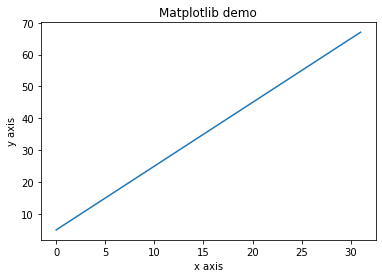

In [25]:
data = np.arange(32)
print(data)
y = 2 * data + 5

plt.title("Matplotlib demo") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(data,y) 
plt.show()

In [21]:
data = np.arange(32).reshape(8,4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

### Questions

<b>Question</b>: 

<i> [INSERT ANSWER HERE] </i>